In [1]:
import pandas as pd
import hashlib
import spacy
nlp = spacy.load("pt_core_news_sm")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans #, MiniBatchKMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import nltk

In [56]:
to_open = "/mnt/hd-atlantico/wesley/datasets/doutorado/ok_busca_de_palavras_chaves/_teste rápido_/615.txt"

# d = Documento()
# d.load_grupos_from_file( to_open )
file_to_read = open( to_open, 'r')
some_text = file_to_read.read()
# print(os.path.basename(filepath))

nlp.max_length = 2999634
t = nlp(some_text)

In [57]:
# sents = list(t.sents)
# len(sents)
# sents[31].text.replace("-\n"," ")

In [104]:
# sentencas = sents[:2000]
# sentencas = list(t.sents)[:2000]
sentencas = list(t.sents)

CLUSTERS = 30

# tentar window_size  menor que desloc
window_size = 12
desloc = 10
max_size = len(sentencas)
r = list(range(desloc,max_size,desloc))

corpus = []
labels = []
j = 0
TERMO = "compra"
LOCALIZACOES_TERMO = []
for i in r:
    snippet = " ".join( [ s.text.replace("-\n","").replace("\n","") for s in sentencas[i-desloc:i+window_size-desloc] ] )
    clas_ = TERMO in snippet
    corpus.append( snippet )
    labels.append( clas_ )
    if clas_:
        print(f"Está no item {j}")
        LOCALIZACOES_TERMO.append(j)
    j += 1
#     print("-" * 20)
print( f"Tamanho do corpus: { len(corpus) }" )

Está no item 617
Está no item 623
Está no item 629
Está no item 634
Está no item 657
Está no item 658
Está no item 659
Está no item 660
Está no item 661
Está no item 1429
Está no item 2145
Está no item 2379
Está no item 2380
Está no item 2454
Tamanho do corpus: 2957


In [105]:
# [x for x in corpus if "teste rápido" in x ]
corpus[:10]
labels[:10]

[False, False, False, False, False, False, False, False, False, False]

In [106]:
vectorizer = TfidfVectorizer(max_df=0.1, 
                             min_df=3,
                             max_features=5000,
                             stop_words=nltk.corpus.stopwords.words('portuguese'),
                             use_idf=True)


X = vectorizer.fit_transform(corpus)

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmeans = KMeans(n_clusters=CLUSTERS, 
                init='random',  # 'k-means++'
                max_iter=100, 
                n_init=1, 
                verbose=True)

kmeans.fit(X)

print("Silhouette Coefficient: %0.3f"     % metrics.silhouette_score(X, kmeans.labels_, sample_size=1000))

Initialization complete
Iteration 0, inertia 4687.599514150621
Iteration 1, inertia 2552.3676464707255
Iteration 2, inertia 2488.8597862148295
Iteration 3, inertia 2459.112918172704
Iteration 4, inertia 2448.4472225673985
Iteration 5, inertia 2440.9411096114723
Iteration 6, inertia 2437.9034808640654
Iteration 7, inertia 2436.3209847123035
Iteration 8, inertia 2435.031305739289
Iteration 9, inertia 2433.8268864614815
Iteration 10, inertia 2432.930588581812
Iteration 11, inertia 2432.3004238708327
Iteration 12, inertia 2430.906504756106
Iteration 13, inertia 2429.184887343333
Iteration 14, inertia 2428.8684296882207
Iteration 15, inertia 2428.2462571998713
Iteration 16, inertia 2427.9191691752653
Iteration 17, inertia 2427.65097306563
Iteration 18, inertia 2427.509331251292
Iteration 19, inertia 2427.235794520941
Iteration 20, inertia 2427.0645397827843
Converged at iteration 20: strict convergence.
Silhouette Coefficient: 0.035


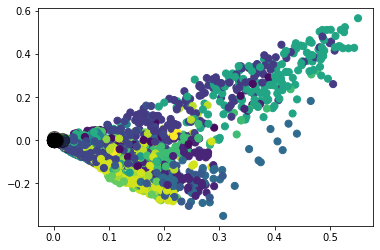

In [107]:
SVD = TruncatedSVD(n_components=2).fit(X)
data2D = SVD.transform(X)


y_kmeans = kmeans.predict(X)

plt.scatter(data2D[:, 0], data2D[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [108]:
# y_kmeans[93]
# data2D[93]
# vectorizer.decode(X[93])
# vectorizer.decode("Este é um teste")
# for n_clu in range(603,606):
for n_clu in LOCALIZACOES_TERMO:
    print(">>> ", f"{n_clu}", " " ,"=" * 30, "   [" , y_kmeans[n_clu],"]   ", "=" * 30 )
    print(corpus[n_clu])

>>>  617   ==============================    [ 18 ]    ==============================
O fiscal deverá comunicar ao Diretor Geral do SAAE qualquer serviço em desacordo com o contrato, para que este,mediante termo próprio, determine as providências que deverão ser adotadas. Art. 3º Aplicam-se as disposições desta Portaria, no que couberem, aos convênios, ajustes e outros instrumentos congêneres celebrados por esta autarquia. Art. 4º Fica estabelecido que o FISCAL ADJUNTO será responsável pelo contrato no período de Afastamento do FISCALTITULAR, conforme consta no Estatuto do SAAE Lei 2898/06, que rege os tipos de afastamentos, com as mesmas atribuições do fiscal titular. Art. 5º Ao FISCAL DO CONTRATO incumbe:I - representar a administração junto ao contratado, exceto para assinatura de instrumentos contratuais, aditivos;II - adotar as providências necessárias ao fiel cumprimento do contrato, inclusive notificando o contratado para corrigirirregularidades detectadas e registrando todos os

In [109]:
# ttt = list( range(1,CLUSTERS) )
from collections import Counter

Counter(y_kmeans)


Counter({6: 484,
         21: 41,
         7: 115,
         28: 27,
         12: 38,
         14: 39,
         0: 40,
         16: 133,
         18: 102,
         17: 156,
         27: 552,
         26: 87,
         20: 91,
         9: 28,
         5: 128,
         19: 57,
         22: 75,
         25: 102,
         3: 102,
         29: 18,
         1: 44,
         10: 76,
         8: 117,
         24: 10,
         13: 110,
         23: 24,
         11: 70,
         4: 38,
         2: 30,
         15: 23})